<a href="https://colab.research.google.com/github/pjprathmesh/Normface0Softmax-loss/blob/master/normface_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Aug  8 18:58:47 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

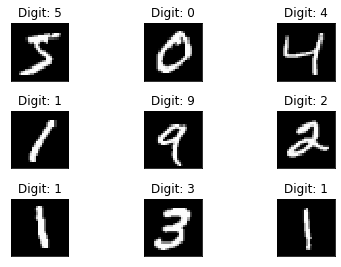

In [ ]:
import keras
import keras.backend as K
from keras.datasets import mnist
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Input,BatchNormalization,GlobalMaxPooling2D,Lambda
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

yy=y_train.copy()
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

input_shape = ( 28,28,1)


X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train=y_train.astype(np.int64)
y_test=y_test.astype(np.int64)
X_train.dtype
dataset=tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(1000).shuffle(1000, reshuffle_each_iteration=True)

In [ ]:
num_category = 10


inp=Input(input_shape)

x=Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,kernel_regularizer=keras.regularizers.L2(0.01))(inp)
x=MaxPooling2D(pool_size=(1, 1))(x)
x=BatchNormalization()(x)

x=Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,kernel_regularizer=keras.regularizers.L2(0.01))(x)
x=MaxPooling2D(pool_size=(1, 1))(x)
x=BatchNormalization()(x)

x=Conv2D(128, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,kernel_regularizer=keras.regularizers.L2(0.01))(x)

x=MaxPooling2D(pool_size=(1, 1))(x)
x=BatchNormalization()(x)

x=Flatten()(x)
x=Dense(128, activation='relu',kernel_regularizer=keras.regularizers.L2(0.01))(x)


x=Dense(2,use_bias=False,)(x)


x=Dense(num_category, activation='softmax',)(x)

model=Model(inp,x)

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
# batch_size = 1000
num_epoch = 30
model_log = model.fit(dataset,batch_size=500,epochs=num_epoch,verbose=1,validation_data=(X_test, y_test))

Epoch 1/30
60/60 [==============================] - 5s 77ms/step - loss: 5.6635 - accuracy: 0.4621 - val_loss: 4.8832 - val_accuracy: 0.2440
Epoch 2/30
60/60 [==============================] - 4s 74ms/step - loss: 2.7297 - accuracy: 0.6677 - val_loss: 3.4826 - val_accuracy: 0.2915
Epoch 3/30
60/60 [==============================] - 4s 74ms/step - loss: 1.8297 - accuracy: 0.7510 - val_loss: 3.0852 - val_accuracy: 0.2331
Epoch 4/30
60/60 [==============================] - 4s 74ms/step - loss: 1.4374 - accuracy: 0.7590 - val_loss: 3.1200 - val_accuracy: 0.1930
Epoch 5/30
60/60 [==============================] - 4s 74ms/step - loss: 1.2147 - accuracy: 0.7890 - val_loss: 3.4251 - val_accuracy: 0.2206
Epoch 6/30
60/60 [==============================] - 4s 74ms/step - loss: 1.0494 - accuracy: 0.8658 - val_loss: 3.1628 - val_accuracy: 0.3123
Epoch 7/30
60/60 [==============================] - 4s 74ms/step - loss: 0.9009 - accuracy: 0.9433 - val_loss: 2.0930 - val_accuracy: 0.4975
Epoch 8/30
60

KeyboardInterrupt: ignored

(60000, 2)

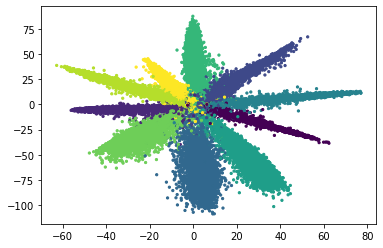

In [ ]:
model2=Model(model.input,model.layers[-2].output)
h=model2.predict(X_train[:])
plt.scatter(h[:,0],h[:,1],c=yy[:],s=5)
h.shape

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 512)       590336    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 512)       0         
_________________________________________________________________
flatten (Flatten)            (None, 294912)            0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [ ]:
x1=Lambda(lambda  x: K.l2_normalize(x,axis=1))(model.layers[-2].output)
x=Dense(num_category, activation='softmax',)(x1)
model_final=Model(model.input,[x1,x])

In [ ]:
model_final.summary()

Model: "functional_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 512)       590336    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 512)       0         
_________________________________________________________________
flatten (Flatten)            (None, 294912)            0         
_________________________________________________________________
dense (Dense)                (None, 128)             

                  ***DOT PRODUCT(euclidean)***

In [ ]:
from sklearn.metrics import accuracy_score

epochs = 30
eps = 1e-8
batch_size = 1000
scce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer =tf.keras.optimizers.Adam(0.0005)
for epoch in range(epochs):
  for x_batch_train, y in dataset:
    with tf.GradientTape() as tape:
    
            
            w =model_final.layers[-1].get_weights()
            w_norm=K.l2_normalize(w[0],axis=1)
            model_final.layers[-1].set_weights(([w_norm,w[1]]))

            o = model_final(x_batch_train, training=True)
            logits=50*o[1]
            
            
            loss_value =scce(y, logits)
            # print(logits,res)
            # print(loss_value)
           
    grads = tape.gradient(loss_value, model_final.trainable_weights)
    optimizer.apply_gradients(zip(grads, model_final.trainable_weights))

  if epoch%1==0:
 
    logits = model_final(X_test, training=False)[1]
  

    
  
    soft=tf.nn.softmax(logits)
    loss_value =scce(y_test, logits).numpy()
    out=tf.math.argmax(soft,axis=1)
    test=accuracy_score(y_test, out)
    print("test acc "+str(test)+" test loss "+str(loss_value))
  
            
            




    
  
  print("epoch : "+ str(epoch)+" loss : "+str(loss_value))
  print()

test acc 0.5709 test loss 2.261398
epoch : 0 loss : 2.261398

test acc 0.844 test loss 2.259365
epoch : 1 loss : 2.259365

test acc 0.8694 test loss 2.2586763
epoch : 2 loss : 2.2586763

test acc 0.8347 test loss 2.2583416
epoch : 3 loss : 2.2583416

test acc 0.9595 test loss 2.2573767
epoch : 4 loss : 2.2573767

test acc 0.9452 test loss 2.2569253
epoch : 5 loss : 2.2569253

test acc 0.9484 test loss 2.2566729
epoch : 6 loss : 2.2566729

test acc 0.9569 test loss 2.256437
epoch : 7 loss : 2.256437

test acc 0.9189 test loss 2.256107
epoch : 8 loss : 2.256107

test acc 0.9551 test loss 2.255952
epoch : 9 loss : 2.255952

test acc 0.9684 test loss 2.2558165
epoch : 10 loss : 2.2558165

test acc 0.9776 test loss 2.2555952
epoch : 11 loss : 2.2555952

test acc 0.9831 test loss 2.2554462
epoch : 12 loss : 2.2554462

test acc 0.9769 test loss 2.2554634
epoch : 13 loss : 2.2554634

test acc 0.9792 test loss 2.2553465
epoch : 14 loss : 2.2553465

test acc 0.9829 test loss 2.2551992
epoch : 15

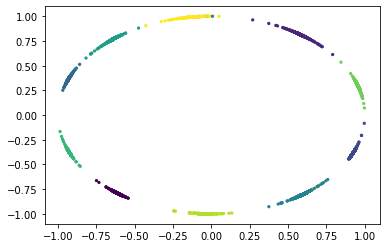

In [ ]:
model_vis=Model(model.input,model_final.layers[-2].output)
h=model_vis.predict(X_train[:])
plt.scatter(h[:,0],h[:,1],c=yy,s=5)